In [1]:
import numpy as np
import math
class perceptron:
    def __init__(self, weights:list, bias=0, output:bool=False) -> None:
        self.bias = bias
        self.weights = weights
        self.output = output
        self.activity = 0
        self.activation = 0
        self.d_weights = weights.copy() # shouldn't use before it gets set
        self.d_bias = 0
        self.delta = 0

    def forward(self, x):
        self.calculate_activity(x)
        return self.calculate_activation()

    def calculate_activity(self, inputs:list):
        # A_j = sum(w_ij * x_i) + bias
        total = self.bias
        for x in range(len(inputs)):
            total += inputs[x] * self.weights[x]
        self.activity = total
        return total
    
    def calculate_activation(self):
        # y_j = f(A_j) -- using sigmoid
        self.activation = 1 / (1 + math.exp(self.activity * -1))
        return self.activation

    def calculate_delta_w(self, x, eta, expected=None, dk_w=None):
        # delta_w = eta * (d_k * x_j)
        # d_k = e_k (1-y)y
        if(self.output):
            self.delta = (expected - self.activation) * (1-self.activation) * self.activation
        else:
            self.delta = (1 - self.activation) * self.activation * (dk_w)
        for i in range(len(x)):
            self.d_weights[i] = eta * self.delta * x[i]
        self.d_bias = eta * self.delta
        return self.delta, self.d_weights

    def calculate_previous_d(self):
        prevs = []
        for weight in self.weights:
            prevs.append(weight*self.delta)
        return prevs

    def update_weights(self, bias=True):
        for i in range(len(self.weights)):
            self.weights[i] = self.weights[i] + self.d_weights[i]
        if bias: self.bias = self.bias + self.d_bias
        return self.weights
    
    def compute_error(self, expected):
        e = ((expected - self.activation) ** 2) / 2
        return e
    
    def get_weights(self):
        return self.weights, self.bias

class layer:
    pass

In [2]:
import pandas as pd
from random import random

# this makes is so even => odd and odd => even
data = pd.read_csv("data.csv")
training_data = data.iloc[[x for x in range(0,19,2)]]   # items 1,3,5,...,19
test_data = data.iloc[[x for x in range(1,20,2)]]       # items 2,4,6,...,20
print(data.head())
print(training_data.head())
print(test_data.head())

   Data item   LAC   SOW  TACA
0          1  0.90  0.87     1
1          2  1.81  1.02     0
2          3  1.31  0.75     1
3          4  2.36  1.60     0
4          5  2.48  1.14     0
   Data item   LAC   SOW  TACA
0          1  0.90  0.87     1
2          3  1.31  0.75     1
4          5  2.48  1.14     0
6          7  0.41  1.87     0
8          9  2.45  0.52     0
   Data item   LAC   SOW  TACA
1          2  1.81  1.02     0
3          4  2.36  1.60     0
5          6  2.17  2.08     1
7          8  2.85  2.91     1
9         10  1.05  1.93     0


In [3]:
cycles = 30
eta = 1         # TODO: This is something we may choose to adjust
# initial weights
w0 = random()
w1 = random()
bias = random()
print(f"Initial weights: {w0}, {w1}")
print(f"Initial Bias: {bias}")
node1 = perceptron([w0,w1], bias, output=True)

for i in range(cycles):
    for index in range(len(training_data)):
        entry = training_data.iloc[index]
        input = [entry["LAC"], entry["SOW"]]
        expected = entry["TACA"]
        node1.forward(input)
        node1.calculate_delta_w(input, eta, expected)
        node1.update_weights()

w, b = node1.get_weights()
print(f"Final weights: {w[0]}, {w[1]}")
print(f"Final bias: {b}")

Initial weights: 0.7492995983105506, 0.4026658455911002
Initial Bias: 0.45531220568147
Final weights: -1.3891694100874814, -2.15355479449871
Final bias: 3.4163336585181914


In [4]:
print("--On Test Data--")
for index in range(len(test_data)):
    entry = test_data.iloc[index]
    input = [entry["LAC"], entry["SOW"]]
    expected = entry["TACA"]
    output = node1.forward(input)
    print(f"Item {entry['Data item']}: Expected {expected}, Got {output}")
print("--On Training Data--")
for index in range(len(training_data)):
    entry = training_data.iloc[index]
    input = [entry["LAC"], entry["SOW"]]
    expected = entry["TACA"]
    output = node1.forward(input)
    print(f"Item {entry['Data item']}: Expected {expected}, Got {output}")

--On Test Data--
Item 2.0: Expected 0.0, Got 0.2150602293525372
Item 4.0: Expected 0.0, Got 0.03530478106373964
Item 6.0: Expected 1.0, Got 0.016666330861278104
Item 8.0: Expected 1.0, Got 0.0011018704983933893
Item 10.0: Expected 0.0, Got 0.09987133780640527
Item 12.0: Expected 0.0, Got 0.028410097756839937
Item 14.0: Expected 0.0, Got 0.12039677005161456
Item 16.0: Expected 0.0, Got 0.035085654736060366
Item 18.0: Expected 1.0, Got 0.8173271088765999
Item 20.0: Expected 0.0, Got 0.035022926259652976
--On Training Data--
Item 1.0: Expected 1.0, Got 0.5726052539484344
Item 3.0: Expected 1.0, Got 0.495339043873759
Item 5.0: Expected 0.0, Got 0.07699750320071554
Item 7.0: Expected 0.0, Got 0.23498508877391727
Item 9.0: Expected 0.0, Got 0.24843435917425333
Item 11.0: Expected 1.0, Got 0.0014889197647283033
Item 13.0: Expected 1.0, Got 0.9579232314580794
Item 15.0: Expected 0.0, Got 0.06671147875398756
Item 17.0: Expected 1.0, Got 0.7987187637227326
Item 19.0: Expected 0.0, Got 0.02244319

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

preds = []
exps = []
for index in range(len(test_data)):
    entry = test_data.iloc[index]
    input = [entry["LAC"], entry["SOW"]]
    exps.append(entry["TACA"])
    preds.append(node1.forward(input))

tns = []
fps = []
fns = []
tps = []
thresholds = np.arange(0,1,.01)
for t in thresholds:
    thresh_pred = []
    for x in preds:
        if x > t:
            thresh_pred.append(1)
        else:
            thresh_pred.append(0)
    tn, fp, fn, tp = confusion_matrix(exps, thresh_pred).ravel()
    tns.append(tn)
    fps.append(fp)
    fns.append(fn)
    tps.append(tp)

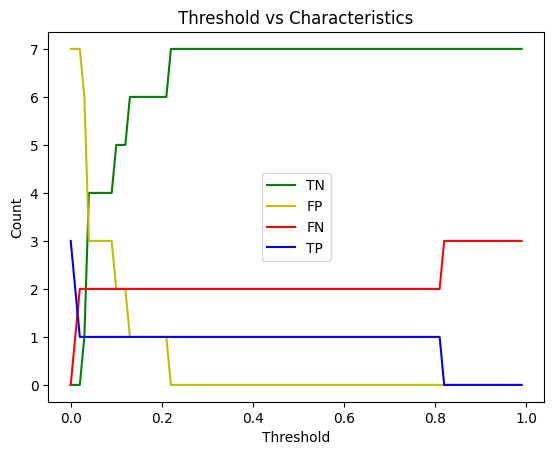

In [14]:
plt.plot(thresholds, tns, "g", label="TN")
plt.plot(thresholds, fps, "y", label="FP")
plt.plot(thresholds, fns, "r", label="FN")
plt.plot(thresholds, tps, "b", label="TP")
plt.title("Threshold vs Characteristics")
plt.xlabel("Threshold")
plt.ylabel("Count")
plt.legend()

In [16]:
tns = np.array(tns)
fps = np.array(fps)
fns = np.array(fns)
tps = np.array(tps)
precision = tps / (tps + fps +.0001)
recall = tps / (tps + fns + .0001)
sensitivity = tps / (tps + fns + .0001)
specificity = tns / (tns + fps + .0001)
f1_score = tps / (tps + ((fps + fns) / 2))

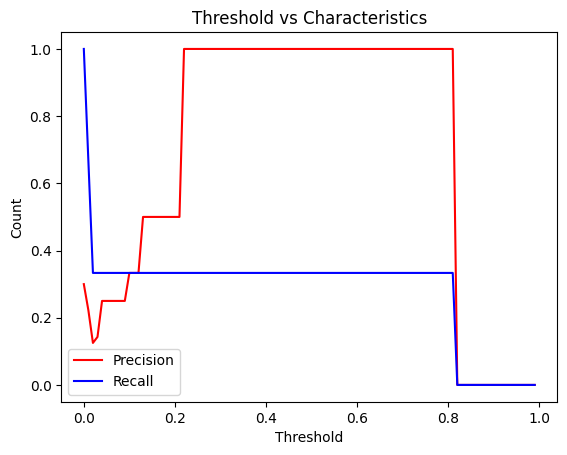

In [17]:
plt.plot(thresholds, precision, "r", label="Precision")
plt.plot(thresholds, recall, "b", label="Recall")
plt.title("Threshold vs Characteristics")
plt.xlabel("Threshold")
plt.ylabel("Count")
plt.legend()

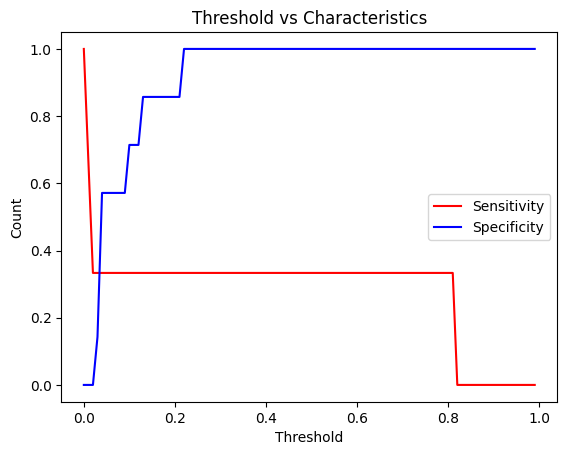

In [18]:
plt.plot(thresholds, sensitivity, "r", label="Sensitivity")
plt.plot(thresholds, specificity, "b", label="Specificity")
plt.title("Threshold vs Characteristics")
plt.xlabel("Threshold")
plt.ylabel("Count")
plt.legend()

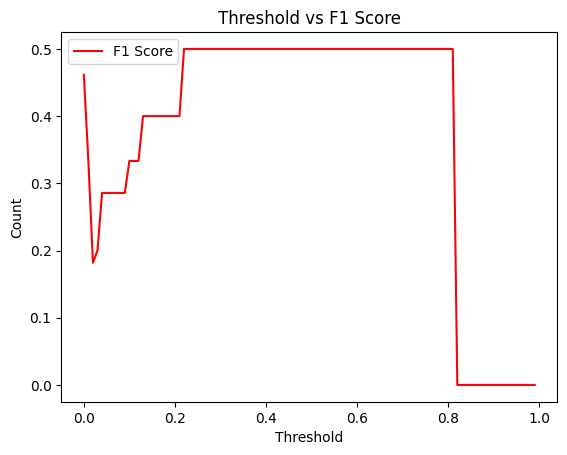

In [19]:
plt.plot(thresholds, f1_score, "r", label="F1 Score")
plt.title("Threshold vs F1 Score")
plt.xlabel("Threshold")
plt.ylabel("Count")
plt.legend()